# DATA SCIENCE PROJECT 
## LUNG CAPACITY

A data frame of data related to the lung capacity of students. The dataset consists of 6 variables and 724 observations.

### 1. Import required library

In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns             # Seaborn for data visualization
%matplotlib inline

### 2. Import LungCap Dataset and Take a Look

In [3]:
df = pd.read_csv('LungCap.csv', usecols=['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean'])

In [4]:
df.head

<bound method NDFrame.head of      LungCap  Age  Height Smoke  Gender Caesarean
0      6.475    6    62.1    no    male        no
1     10.125   18    74.7   yes  female        no
2      9.550   16    69.7    no  female       yes
3     11.125   14    71.0    no    male        no
4      4.800    5    56.9    no    male        no
..       ...  ...     ...   ...     ...       ...
720    5.725    9    56.0    no  female        no
721    9.050   18    72.0   yes    male       yes
722    3.850   11    60.5   yes  female        no
723    9.825   15    64.9    no  female        no
724    7.100   10    67.7    no    male        no

[725 rows x 6 columns]>

In [5]:
df.columns

Index(['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [6]:
df.describe()

,LungCap,Age,Height
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


### 3. Check Null Values 

If we have null values we need to decide if we should drop them or replace them with the mean value.

In [7]:
df.isnull().sum() 

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

### 4. EDA 

At that part, we will take a closer look at the data with Seaborn visualization tools which will be helpful to understand 
data trends and distribution of the data.

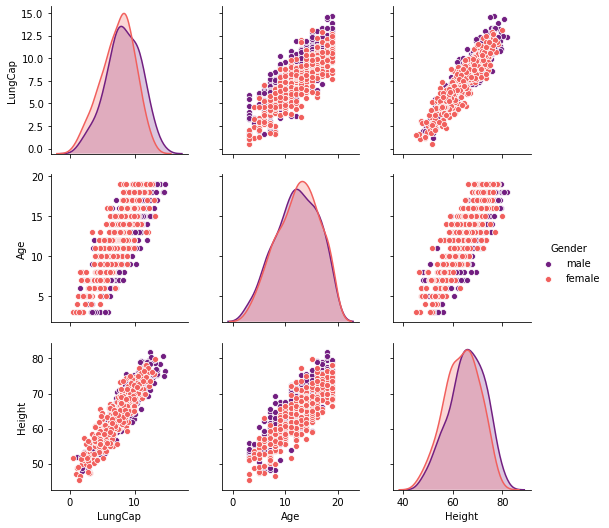

In [8]:
sns.pairplot(df, hue = 'Gender', palette = 'magma')

According to Pairplot above, we can observe that there are linear distribution between LungCap and Height and between LungCap and Age as well. 

Since Caesarean data is not numerical, I prefer to use boxplot and barplot to analyze that attribute.

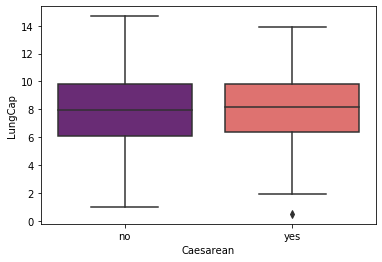

In [9]:
sns.boxplot(x = 'Caesarean', y = 'LungCap', data = df, palette = 'magma')

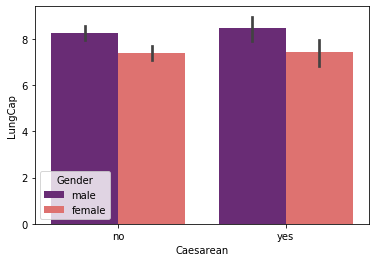

In [10]:
sns.barplot(x = 'Caesarean', y = 'LungCap', data=df, hue = 'Gender', palette='magma')

According to the plots above, Caesarean attribute has not much impact on LungCap. 

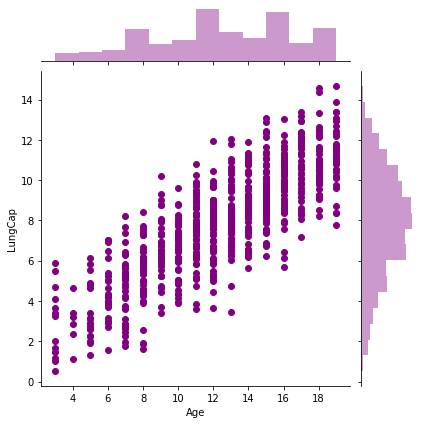

In [11]:
sns.jointplot(x = 'Age', y = 'LungCap', data=df, color = 'purple')

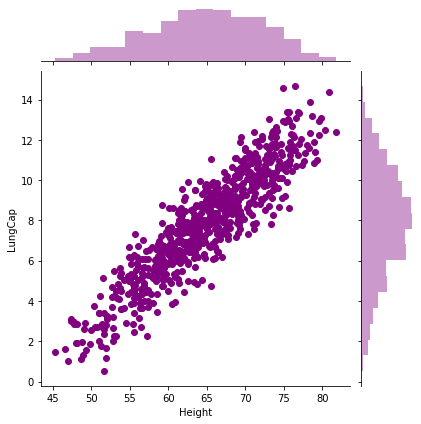

In [12]:
sns.jointplot(x = 'Height', y = 'LungCap', data=df, color = 'purple')

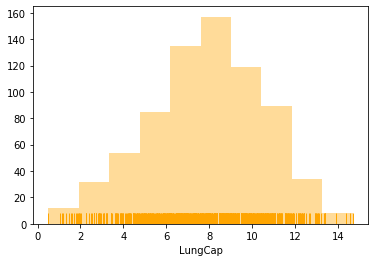

In [13]:
sns.distplot(df['LungCap'], kde = False,  bins = 10, rug = True, color = 'Orange' )

### 5. Distribution of Data

Let's find the statistical distribution of the attributes.

In [14]:
df.std()

LungCap    2.662008
Age        4.004750
Height     7.202144
dtype: float64

In [15]:
df.mean()

LungCap     7.863148
Age        12.326897
Height     64.836276
dtype: float64

In [16]:
df.quantile()

LungCap     8.0
Age        13.0
Height     65.4
Name: 0.5, dtype: float64

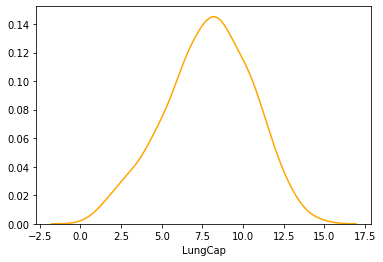

In [17]:
sns.distplot(df['LungCap'], hist=False , color = 'Orange')

LungCap attribute is normally distributed.

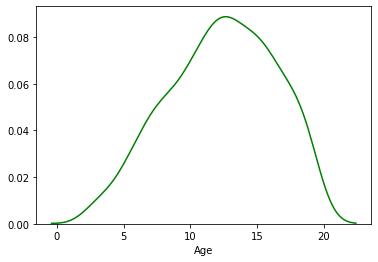

In [18]:
sns.distplot(df['Age'], hist=False, color = 'Green')

### 6. T-TEST and ANOVA 

In [19]:
# T-TEST
from scipy.stats import ttest_ind
data1 = df['LungCap']
data2 = df['Height']
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


stat=-199.789, p=0.000
Probably different distributions


In [20]:
# ANOVA
from scipy.stats import f_oneway
data1 = df['LungCap']
data2 = df['Height']
data3 = df['Age']
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


stat=29113.506, p=0.000
Probably different distributions


## 7. Get Dummies 

In [21]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [ ]:
smoke = pd.get_dummies(df['Smoke'], drop_first = True, prefix='Smoke')

In [23]:
gender = pd.get_dummies(df['Gender'], drop_first = True)

In [24]:
caesarean = pd.get_dummies(df['Caesarean'], drop_first = True, prefix='Caesarean')

In [25]:
df = pd.concat([df, smoke, gender, caesarean], axis =1)

In [33]:
df.drop(['Smoke', 'Gender', 'Caesarean'],axis=1,inplace=True)

In [34]:
df.head()

,LungCap,Age,Height,Smoke_yes,male,Caesarean_yes
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


## 8. Train Data  

In [35]:
df.columns

Index(['LungCap', 'Age', 'Height', 'Smoke_yes', 'male', 'Caesarean_yes'], dtype='object')

In [38]:
X = df[['Age', 'Height', 'Smoke_yes', 'male', 'Caesarean_yes']]

In [39]:
y = df['LungCap']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## 9. Chose The Regression Model

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print(lm.intercept_) # That shows the expected mean value of y when all x = 0

-11.680884036705436


In [47]:
print(lm.coef_)

[ 0.15896189  0.26921953 -0.5958363   0.43652476 -0.28516609]


In [49]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns= ['Coefficient'])
coef_df

,Coefficient
Age,0.158962
Height,0.269220
Smoke_yes,-0.595836
male,0.436525
Caesarean_yes,-0.285166


## 10. Predictions 

In [50]:
predictions = lm.predict(X_test)

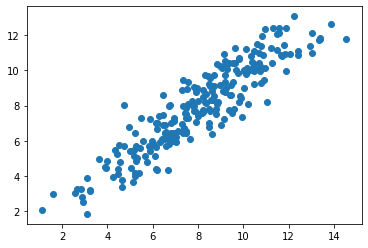

In [51]:
plt.scatter(y_test, predictions)

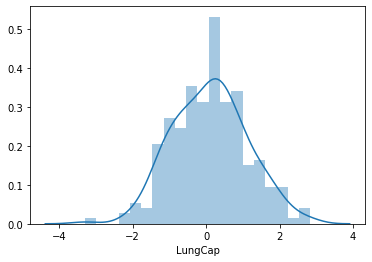

In [56]:
# I want to calculate my model's error rate which is y_test - predictions
# I want to make sure it's normally distruted.
sns.distplot((y_test - predictions), bins = 20)

## 11. Regression Evalution Metrics 

In [57]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
mean_absolute_error = metrics.mean_absolute_error(y_test, predictions)
# MAE is the average of the absolute value of errors.

mean_squared_error = metrics.mean_squared_error(y_test, predictions)
# MSE is the mean of squared errors, more useful than MAE, because it punishes larger errors.

root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y_test, predictions))
# RMSE is the square root of the mean of the squared error, more useful than MSE, because it's interpretable in the 'y' unit

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8200738515672604
MSE: 1.0369709523903794
RMSE: 1.018317707000315
